In [ ]:
! pip install pandas scikit-learn matplotlib


## Exercise 1

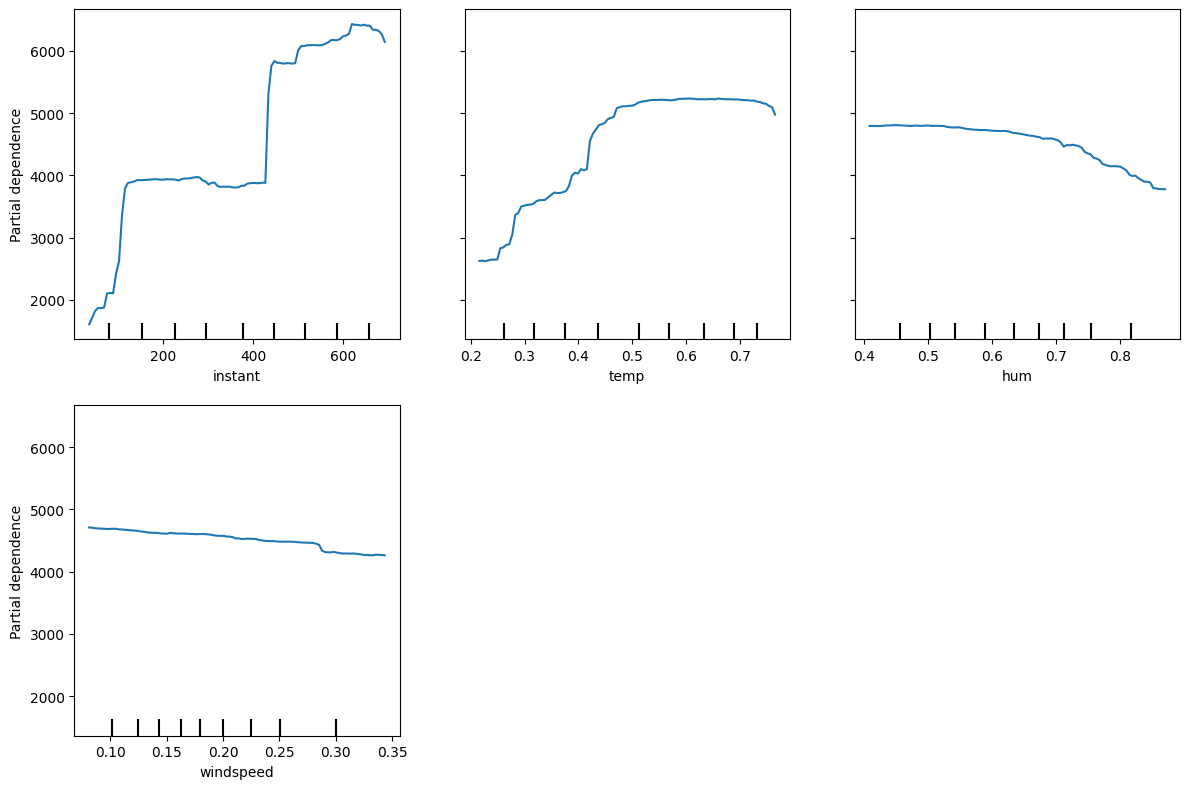

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Cargar los datos
data = pd.read_csv('day.csv')

# Preparar los datos (agregamos 'instant' como "días desde 2011")
X = data[['instant', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
          'weathersit', 'temp', 'hum', 'windspeed']]
y = data['cnt']

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# PDP para 4 variables
features = ['instant', 'temp', 'hum', 'windspeed']
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(model, X_train, features, ax=ax)
plt.tight_layout()
plt.show()



## Exercise 2

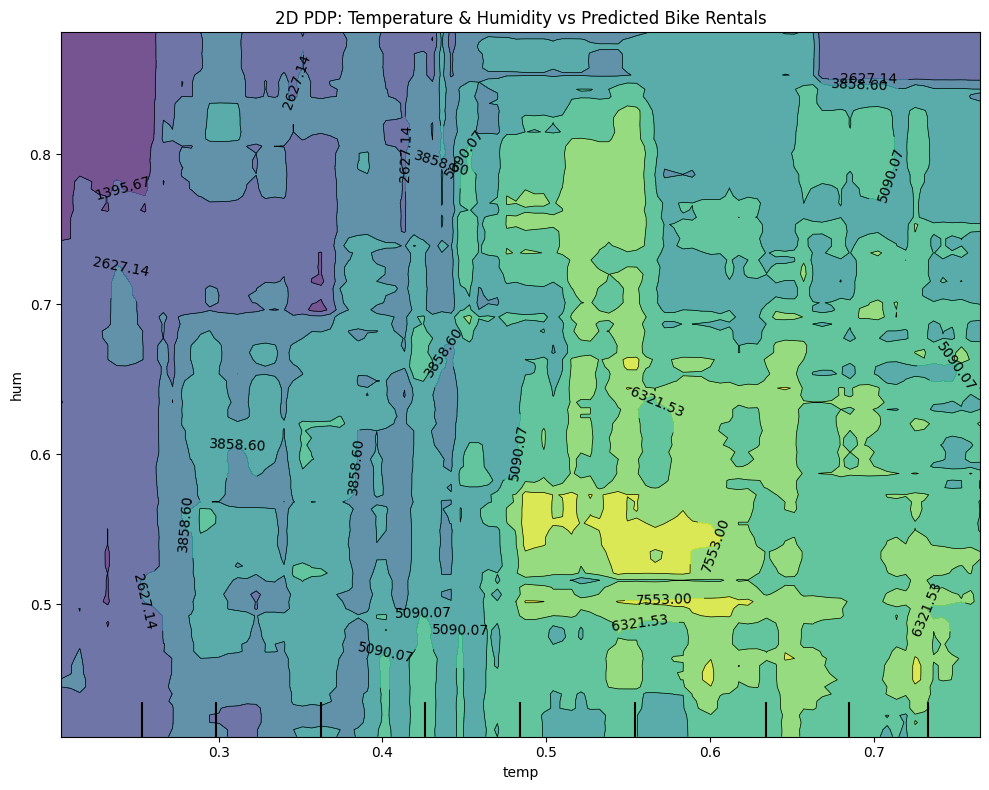

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import PartialDependenceDisplay

# Cargar datos
data = pd.read_csv('day.csv')

# Extraer muestra aleatoria
sample_data = data.sample(n=1000, replace=True, random_state=42)

# Preparar datos
X = sample_data[['temp', 'hum']]
y = sample_data['cnt']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 8))

# Mostrar PDP 2D directamente con nombres de columnas
PartialDependenceDisplay.from_estimator(
    model,
    X_train,
    features=[('temp', 'hum')],
    kind='average',
    ax=ax
)

# Añadir distribución de densidad (por separado)
sns.kdeplot(
    data=sample_data,
    x='temp',
    y='hum',
    cmap="Reds",
    fill=True,
    thresh=0.05,
    alpha=0.4,
    ax=ax
)

# Títulos
ax.set_title('2D PDP: Temperature & Humidity vs Predicted Bike Rentals')
plt.tight_layout()
plt.show()


## Exercise 3

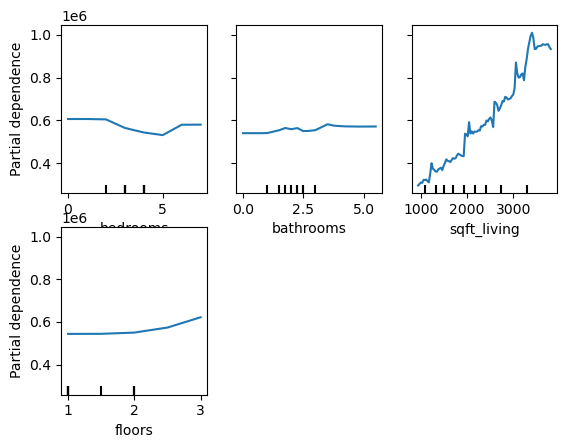

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split

# Cargar los datos
data = pd.read_csv('kc_house_data.csv')

# Extraer una muestra aleatoria de los datos
sample_data = data.sample(n=1000, random_state=42)

# Preparar los datos
X = sample_data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']]
y = sample_data['price']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Crear el Partial Dependence Plot
features = ['bedrooms', 'bathrooms', 'sqft_living', 'floors']
PartialDependenceDisplay.from_estimator(model, X_train, features)
plt.show()
